In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from main_symmetry import measure_symmetry

def create_plots(dataset, attack_name, epsilons=None, save=False):
    print("#############################################################")
    print(dataset, attack_name, epsilons)
    print("#############################################################")
    result_path = "results" + os.sep + dataset + os.sep 
    figure_path = result_path + "figures" + os.sep
    
    if epsilons is None:
        df = pd.read_csv(result_path + f"{attack_name}.csv")
    if epsilons is not None:
        df = pd.read_csv(result_path + f"{attack_name}, epsilon={epsilons}.csv")
    
    confusion_matrix = df[df.columns[1:]].to_numpy()
    
    if dataset == "MNIST": 
        labels = [str(k) for k in np.arange(10)] 
        
    if dataset == "FashionMNIST": 
        labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        
    if dataset == "CIFAR-10":
        labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                  'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    
    plt.imshow(confusion_matrix)
    plt.xticks(range(len(labels)), labels, size='small')
    plt.yticks(range(len(labels)), labels, size='small')
    
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.colorbar()
    plt.set_cmap("viridis")
    
    titlesize = 22

    sym = str(np.round(measure_symmetry(confusion_matrix),2))
    sym = sym + "0"*(4-len(sym))
    if epsilons is None:
        plt.title(f"Symmetry: {sym}", fontsize = titlesize)
    if epsilons is not None:
        plt.title(f"Symmetry: {sym}, ϵ={epsilons}", fontsize = titlesize)
    
    if not save:
        plt.show()
        return 
    
    if epsilons is None:
        plt.savefig(figure_path + f"{attack_name}.png", bbox_inches='tight')
        plt.savefig(figure_path + f"{attack_name}.pdf", bbox_inches='tight')
    
    if epsilons is not None:
        plt.savefig(figure_path + f"{attack_name}, epsilon={epsilons}.png", bbox_inches='tight')
        plt.savefig(figure_path + f"{attack_name}, epsilon={epsilons}.pdf", bbox_inches='tight')

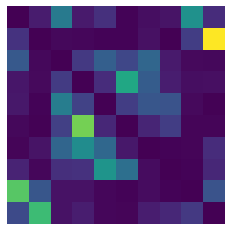

In [9]:
path = "results" + os.sep + "CIFAR-10" + os.sep
attack_name="L0BrendelBethgeAttack"
df = pd.read_csv(path + f"{attack_name}.csv")
confusion_matrix = df[df.columns[1:]].to_numpy()
plt.axis('off')
plt.imshow(confusion_matrix)
plt.savefig("../Seminar thesis/titlefigure.eps", bbox_inches='tight', format='eps')
